## OB1 performance on the flanker task and the sentence task

In [1]:
from tqdm import tqdm
import mne
import numpy as np
import glob
import os
import pickle
import scipy
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats 
import seaborn as sns

### Embedded Words task


## Initialising the data frame from pickled file

In [2]:
#ENGLISH
df= pd.read_pickle(r"C:\Users\Konstantin\Documents\VU_work\OB1_SAM\Results\alldata_EmbeddedWords.pkl")
df=pd.DataFrame(df)

In [3]:
df2plot=df.copy(deep=True)
df2plot['suffixed']=df['condition'].str.split('/').str[0] #NV: Add new column with suffix / non suffix and extract info from condition
df2plot['condition']=df['condition'].str.split('/').str[1]#NV: and replace condition with only the actual condition

df2plot['RT']=df2plot['reaction time'].str[0]

In [4]:
df2plot.tail(3)

#df2plot.at[1, 'target activity per cycle']

,stimulus,prime,target,condition,cycle,lexicon activity per cycle,stimulus activity per cycle,target activity per cycle,bigram activity per cycle,ngrams,...,correct,POS,position,inhibition_value,wordlen_threshold,target_inhib,error_rate,item_nr,suffixed,RT
129,ski,dusty,ski,unrelated prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 11.362117762335153, ...","[0, 0, 0, 0, 0, 0.30169568435030264, 0.5062557...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[2.279542897554733, 2.279542897554733, 2.27954...","[3, 3, 3, 3, 3, 11, 11, 5, 5, 5, 5, 5, 5, 5, 5]",...,[1],[],[],-1.2,0.15,"[[0.0], [0.0], [0.0], [0.0], [0.0], [-0.000215...",0.11627906976744186,130,non suffixed,525
130,won,gloomy,won,unrelated prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]","[0.0, 0.0, 0.0, 0.0, 0.0, 10.815803702484448, ...","[0, 0, 0, 0, 0, 0.3545382941601504, 0.58283271...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[2.279542897554733, 2.279542897554733, 2.27954...","[3, 3, 3, 3, 3, 10, 10, 5, 5, 5, 5, 5]",...,[1],[],[],-1.2,0.15,"[[0.0], [0.0], [0.0], [0.0], [0.0], [-0.000536...",0.11538461538461539,131,non suffixed,450
131,cart,girdle,cart,unrelated prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 15.9320343176995, 27...","[0, 0, 0, 0, 0, 0.27932376503192746, 0.4611684...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[2.279542897554733, 2.279542897554733, 2.27954...","[3, 3, 3, 3, 3, 14, 14, 8, 8, 8, 8, 8, 8, 8, 8...",...,[0],[],[],-1.2,0.15,"[[0.0], [0.0], [0.0], [0.0], [0.0], [-0.000486...",0.12213740458015267,132,non suffixed,625


Text(0.03, 0.8, ' error rate:0.12213740458015267\n inhibition value:-1.2\n wordlen similarity threshold:0.15')

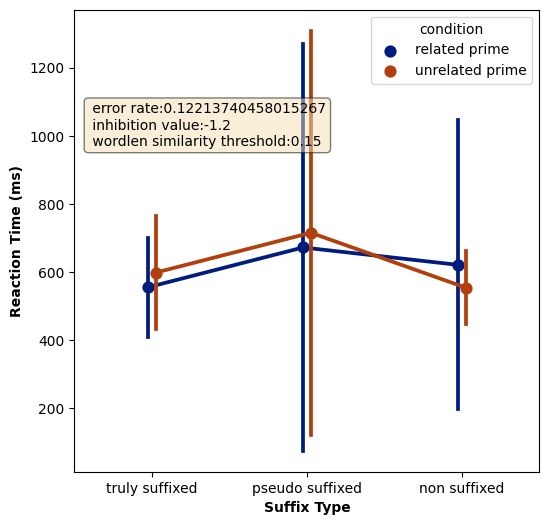

In [5]:
f, ax = plt.subplots(figsize=(6,6))

#Nv: plot reaction times per condition and per suffix

sns.pointplot(x='suffixed', y='RT', hue='condition', palette="dark", ci='sd', dodge=True, font_scale=0.8, data=df2plot) #NV: plot all suffix conditions separated by prime type and standard deviation of the mean
#sns.stripplot(x="suffixed", y="RT", hue='condition', data=df2plot, dodge=False, palette="dark", alpha=.8) #NV: is not so informative, actually.

ax.set_xlabel("Suffix Type",fontdict=dict(weight='bold'))
ax.set_ylabel("Reaction Time (ms)",fontdict=dict(weight='bold'))

text=' error rate:'+str(df2plot['error_rate'].iloc[-1])+'\n inhibition value:'+str(df2plot['inhibition_value'][1])+'\n wordlen similarity threshold:'+str(df2plot['wordlen_threshold'][1])
ax.text(0.03, 0.8, text, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox= dict(boxstyle='round', facecolor='wheat', alpha=0.5))

In [6]:
#NV: plot difference in correct vs false answers.

i=df[df['correct'].str[0]==0]
print(len(i))
print(i)


16
    stimulus    prime target                        condition  \
7       sing   singer   sing     truly suffixed/related prime   
29      sing   greedy   sing   truly suffixed/unrelated prime   
48       cat    cater    cat    pseudo suffixed/related prime   
53      mist   mister   mist    pseudo suffixed/related prime   
59       tow    tower    tow    pseudo suffixed/related prime   
70       cat    bushy    cat  pseudo suffixed/unrelated prime   
75      mist   sticky   mist  pseudo suffixed/unrelated prime   
81       tow    milky    tow  pseudo suffixed/unrelated prime   
92      spin  spinach   spin       non suffixed/related prime   
97       add  address    add       non suffixed/related prime   
104      hot    hotel    hot       non suffixed/related prime   
109     cart   carton   cart       non suffixed/related prime   
114     spin  buttery   spin     non suffixed/unrelated prime   
119      add  speaker    add     non suffixed/unrelated prime   
126      hot    risky 

In [7]:
#NV: plot target activity per cycle. Note : This is much harder here because of variable cycle lenght! ( trial ends on word recog)

target2plot = df.copy(deep=True)

In [8]:
#first figure out max amount of cycles per trial:
max_cycles=0
for i in range(len(target2plot)):
    max_cycles=max(max_cycles, len(target2plot.iloc[i]['target activity per cycle']))
print(max_cycles)
#then pad the shorter cycles with zeros until the max cycle amount (in place)
for i in range(len(target2plot)):
    target2plot.at[i,'target activity per cycle']=np.pad(np.hstack(target2plot.iloc[i]['target activity per cycle']), (0,max_cycles-len(target2plot.iloc[i]['target activity per cycle'])), mode='constant')

    
target2plot = target2plot.explode('target activity per cycle')
target2plot = target2plot.reset_index().rename(columns={'index': 'trial'})

#len(target2plot.tail(1)['cycle'])

127


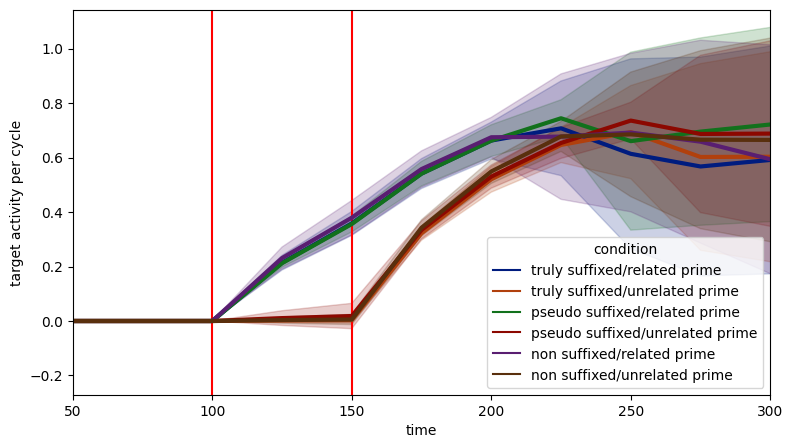

In [9]:
# initializing list of lists 
test_list = list(range(max_cycles))
# declaring magnitude of repetition 
K = len(df)

m = K*test_list
target2plot["cycle nr"] = m
target2plot['time']= target2plot['cycle nr']*25

f, ax = plt.subplots(figsize=(9,5))

ax.set_xlim(left=50, right=300)


ax.axvline(x=4*25, color='red') #prime onset

ax.axvline(x=6*25, color='red') #target onset

sns.lineplot(ax=ax, data=target2plot, x="time", y="target activity per cycle", hue = "condition",palette='dark' , ci='sd',  linewidth=3)


plt.show()

In [10]:
target2plot = df.copy(deep=True)

In [11]:
#first figure out max amount of cycles per trial:
max_cycles=0
for i in range(len(target2plot)):
    max_cycles=max(max_cycles, len(target2plot.iloc[i]['target_inhib']))
print(max_cycles)
#then pad the shorter cycles with zeros until the max cycle amount (in place)
for i in range(len(target2plot)):
    target2plot.at[i,'target_inhib']=np.pad(np.hstack(target2plot.iloc[i]['target_inhib']), (0,max_cycles-len(target2plot.iloc[i]['target_inhib'])), mode='constant')

    
target2plot = target2plot.explode('target_inhib')
target2plot = target2plot.reset_index().rename(columns={'index': 'trial'})

len(target2plot.tail(1)['cycle'])

127


1

In [12]:
target2plot.tail(5)

,trial,stimulus,prime,target,condition,cycle,lexicon activity per cycle,stimulus activity per cycle,target activity per cycle,bigram activity per cycle,...,word predictability,reaction time,correct,POS,position,inhibition_value,wordlen_threshold,target_inhib,error_rate,item_nr
16759,131,cart,girdle,cart,non suffixed/unrelated prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 15.9320343176995, 27...","[0, 0, 0, 0, 0, 0.27932376503192746, 0.4611684...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[2.279542897554733, 2.279542897554733, 2.27954...",...,0,[625],[0],[],[],-1.2,0.15,0.0,0.12213740458015267,132
16760,131,cart,girdle,cart,non suffixed/unrelated prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 15.9320343176995, 27...","[0, 0, 0, 0, 0, 0.27932376503192746, 0.4611684...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[2.279542897554733, 2.279542897554733, 2.27954...",...,0,[625],[0],[],[],-1.2,0.15,0.0,0.12213740458015267,132
16761,131,cart,girdle,cart,non suffixed/unrelated prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 15.9320343176995, 27...","[0, 0, 0, 0, 0, 0.27932376503192746, 0.4611684...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[2.279542897554733, 2.279542897554733, 2.27954...",...,0,[625],[0],[],[],-1.2,0.15,0.0,0.12213740458015267,132
16762,131,cart,girdle,cart,non suffixed/unrelated prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 15.9320343176995, 27...","[0, 0, 0, 0, 0, 0.27932376503192746, 0.4611684...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[2.279542897554733, 2.279542897554733, 2.27954...",...,0,[625],[0],[],[],-1.2,0.15,0.0,0.12213740458015267,132
16763,131,cart,girdle,cart,non suffixed/unrelated prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 15.9320343176995, 27...","[0, 0, 0, 0, 0, 0.27932376503192746, 0.4611684...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[2.279542897554733, 2.279542897554733, 2.27954...",...,0,[625],[0],[],[],-1.2,0.15,0.0,0.12213740458015267,132


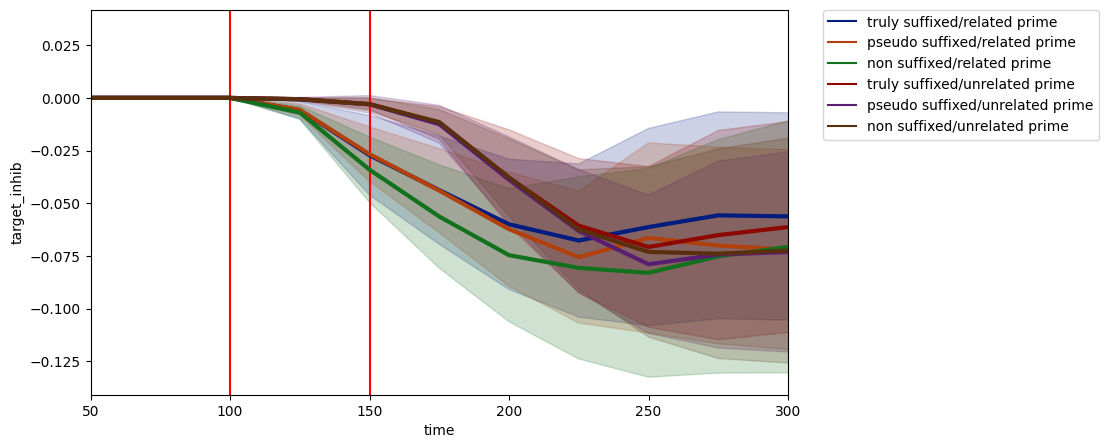

In [13]:
# initializing list of lists 
test_list = list(range(max_cycles))
# declaring magnitude of repetition 
K = len(df)

m = K*test_list
target2plot["cycle nr"] = m
target2plot['time']= target2plot['cycle nr']*25

f, ax = plt.subplots(figsize=(9,5))

ax.set_xlim(left=50, right=300)

ax.axvline(x=4*25, color='red') #prime onset

ax.axvline(x=6*25, color='red') #target onset

hue_order = ['truly suffixed/related prime', 'pseudo suffixed/related prime', 'non suffixed/related prime',
            'truly suffixed/unrelated prime', 'pseudo suffixed/unrelated prime', 'non suffixed/unrelated prime']

sns.lineplot(ax=ax, data=target2plot, x="time", y="target_inhib", hue = "condition",palette='dark' , ci='sd',  linewidth=3, 
            hue_order = hue_order)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

In [14]:
target2plot

,trial,stimulus,prime,target,condition,cycle,lexicon activity per cycle,stimulus activity per cycle,target activity per cycle,bigram activity per cycle,...,correct,POS,position,inhibition_value,wordlen_threshold,target_inhib,error_rate,item_nr,cycle nr,time
0,0,weak,weaken,weak,truly suffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 19.164395059162487, ...","[0, 0, 0, 0, 0, 0.27511454501426424, 0.4423484...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.2078957...","[2.279542897554733, 2.279542897554733, 2.27954...",...,[1],[],[],-1.2,0.15,0.0,0.0,1,0,0
1,0,weak,weaken,weak,truly suffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 19.164395059162487, ...","[0, 0, 0, 0, 0, 0.27511454501426424, 0.4423484...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.2078957...","[2.279542897554733, 2.279542897554733, 2.27954...",...,[1],[],[],-1.2,0.15,0.0,0.0,1,1,25
2,0,weak,weaken,weak,truly suffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 19.164395059162487, ...","[0, 0, 0, 0, 0, 0.27511454501426424, 0.4423484...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.2078957...","[2.279542897554733, 2.279542897554733, 2.27954...",...,[1],[],[],-1.2,0.15,0.0,0.0,1,2,50
3,0,weak,weaken,weak,truly suffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 19.164395059162487, ...","[0, 0, 0, 0, 0, 0.27511454501426424, 0.4423484...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.2078957...","[2.279542897554733, 2.279542897554733, 2.27954...",...,[1],[],[],-1.2,0.15,0.0,0.0,1,3,75
4,0,weak,weaken,weak,truly suffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 19.164395059162487, ...","[0, 0, 0, 0, 0, 0.27511454501426424, 0.4423484...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.2078957...","[2.279542897554733, 2.279542897554733, 2.27954...",...,[1],[],[],-1.2,0.15,0.0,0.0,1,4,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16759,131,cart,girdle,cart,non suffixed/unrelated prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 15.9320343176995, 27...","[0, 0, 0, 0, 0, 0.27932376503192746, 0.4611684...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[2.279542897554733, 2.279542897554733, 2.27954...",...,[0],[],[],-1.2,0.15,0.0,0.12213740458015267,132,122,3050
16760,131,cart,girdle,cart,non suffixed/unrelated prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 15.9320343176995, 27...","[0, 0, 0, 0, 0, 0.27932376503192746, 0.4611684...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[2.279542897554733, 2.279542897554733, 2.27954...",...,[0],[],[],-1.2,0.15,0.0,0.12213740458015267,132,123,3075
16761,131,cart,girdle,cart,non suffixed/unrelated prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 15.9320343176995, 27...","[0, 0, 0, 0, 0, 0.27932376503192746, 0.4611684...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[2.279542897554733, 2.279542897554733, 2.27954...",...,[0],[],[],-1.2,0.15,0.0,0.12213740458015267,132,124,3100
16762,131,cart,girdle,cart,non suffixed/unrelated prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 15.9320343176995, 27...","[0, 0, 0, 0, 0, 0.27932376503192746, 0.4611684...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[2.279542897554733, 2.279542897554733, 2.27954...",...,[0],[],[],-1.2,0.15,0.0,0.12213740458015267,132,125,3125


In [15]:
# zoom in op tijdstip 2 

target2plot_inhibcycle = target2plot[target2plot['cycle nr'] == 6]

In [16]:
target2plot_inhibcycle

,trial,stimulus,prime,target,condition,cycle,lexicon activity per cycle,stimulus activity per cycle,target activity per cycle,bigram activity per cycle,...,correct,POS,position,inhibition_value,wordlen_threshold,target_inhib,error_rate,item_nr,cycle nr,time
6,0,weak,weaken,weak,truly suffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 19.164395059162487, ...","[0, 0, 0, 0, 0, 0.27511454501426424, 0.4423484...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.2078957...","[2.279542897554733, 2.279542897554733, 2.27954...",...,[1],[],[],-1.2,0.15,-0.029342,0.0,1,6,150
133,1,tight,tighten,tight,truly suffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 18.024290391938475, ...","[0, 0, 0, 0, 0, 0.237867358327495, 0.359622210...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.2041244...","[2.279542897554733, 2.279542897554733, 2.27954...",...,[1],[],[],-1.2,0.15,-0.042946,0.0,2,6,150
260,2,box,boxer,box,truly suffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","[0.0, 0.0, 0.0, 0.0, 0.0, 14.818627196406828, ...","[0, 0, 0, 0, 0, 0.29463978781086325, 0.4757563...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.2154051...","[2.279542897554733, 2.279542897554733, 2.27954...",...,[1],[],[],-1.2,0.15,-0.008498,0.0,3,6,150
387,3,own,owner,own,truly suffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]","[0.0, 0.0, 0.0, 0.0, 0.0, 16.352413628096862, ...","[0, 0, 0, 0, 0, 0.2805607076102107, 0.41594722...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.2108290...","[2.279542897554733, 2.279542897554733, 2.27954...",...,[1],[],[],-1.2,0.15,-0.024978,0.0,4,6,150
514,4,farm,farmer,farm,truly suffixed/related prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 18.26118319799341, 2...","[0, 0, 0, 0, 0, 0.2726076327343193, 0.43209121...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.2084291...","[2.279542897554733, 2.279542897554733, 2.27954...",...,[1],[],[],-1.2,0.15,-0.027016,0.0,5,6,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16135,127,too,beefy,too,non suffixed/unrelated prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]","[0.0, 0.0, 0.0, 0.0, 0.0, 12.375591253257083, ...","[0, 0, 0, 0, 0, 0.3699331340883289, 0.59846057...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[2.279542897554733, 2.279542897554733, 2.27954...",...,[1],[],[],-1.2,0.15,-0.000269,0.11811023622047244,128,6,150
16262,128,beg,griped,beg,non suffixed/unrelated prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 13.084045001951205, ...","[0, 0, 0, 0, 0, 0.28054254440306753, 0.4671726...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[2.279542897554733, 2.279542897554733, 2.27954...",...,[1],[],[],-1.2,0.15,-0.001792,0.1171875,129,6,150
16389,129,ski,dusty,ski,non suffixed/unrelated prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 11.362117762335153, ...","[0, 0, 0, 0, 0, 0.30169568435030264, 0.5062557...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[2.279542897554733, 2.279542897554733, 2.27954...",...,[1],[],[],-1.2,0.15,-0.001069,0.11627906976744186,130,6,150
16516,130,won,gloomy,won,non suffixed/unrelated prime,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]","[0.0, 0.0, 0.0, 0.0, 0.0, 10.815803702484448, ...","[0, 0, 0, 0, 0, 0.3545382941601504, 0.58283271...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[2.279542897554733, 2.279542897554733, 2.27954...",...,[1],[],[],-1.2,0.15,-0.002705,0.11538461538461539,131,6,150


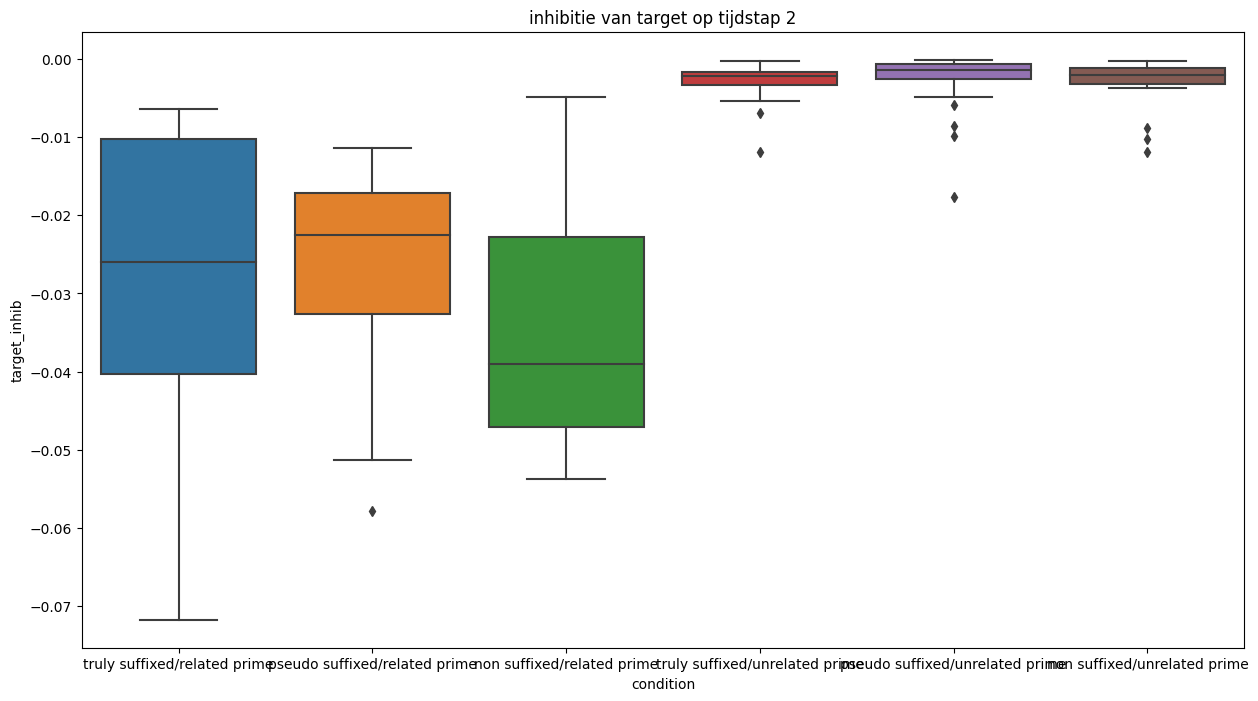

In [17]:
f, ax = plt.subplots(figsize=(15,8))

order = ['truly suffixed/related prime', 'pseudo suffixed/related prime', 'non suffixed/related prime',
            'truly suffixed/unrelated prime', 'pseudo suffixed/unrelated prime', 'non suffixed/unrelated prime']

sns.boxplot(ax = ax, x = 'condition', y = 'target_inhib', data = target2plot_inhibcycle, order = order)
plt.title('inhibitie van target op tijdstap 2')
plt.show()

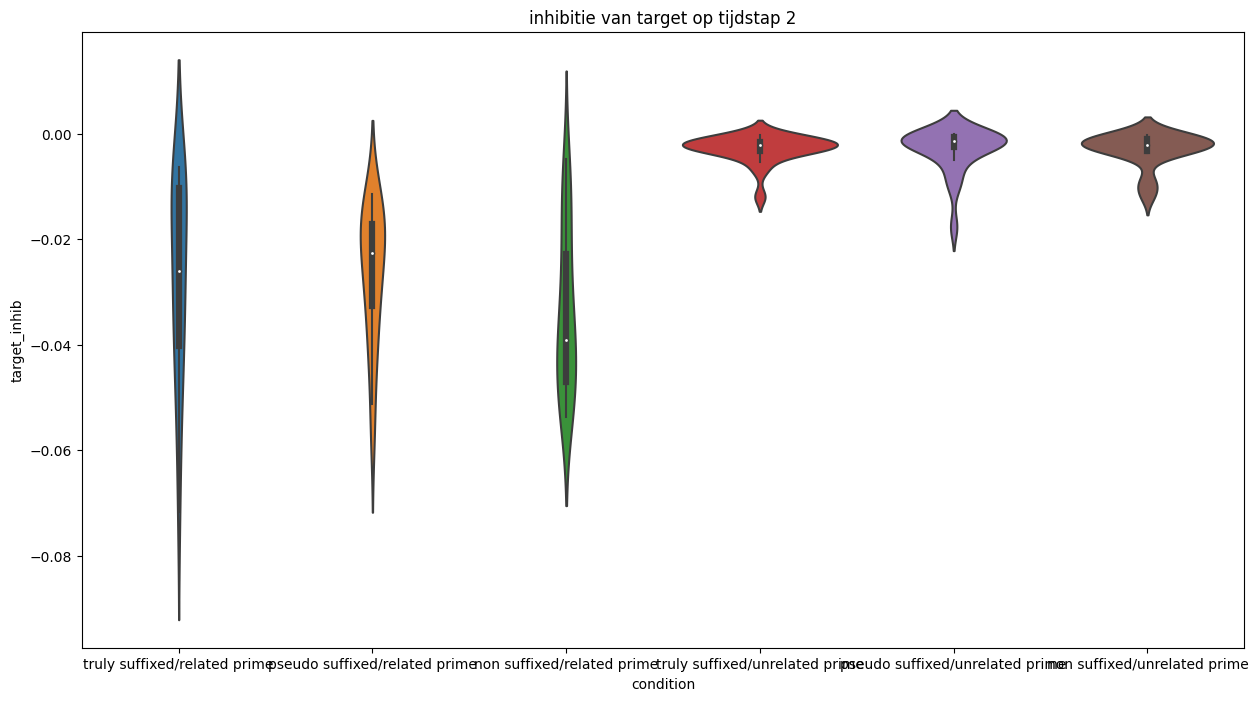

In [18]:
f, ax = plt.subplots(figsize=(15,8))

fix = pd.DataFrame(target2plot_inhibcycle.to_dict())

sns.violinplot(ax = ax, x = 'condition', y = 'target_inhib', data = fix, order = order)
plt.title('inhibitie van target op tijdstap 2')
plt.show()

In [19]:
sns.boxplot(y = 'reaction time', data = target2plot[target2plot['condition'] == 'non suffixed/related prime'])

TypeError: Vertical orientation requires numeric `y` variable.

In [ ]:
target2plot[target2plot['condition'] == 'non suffixed/related prime']

In [ ]:
target2plot_inhibcycle[target2plot_inhibcycle['target_inhib'] == target2plot_inhibcycle[target2plot_inhibcycle['condition'] == 'non suffixed/related prime']['target_inhib'].max()]
## min inhibition

In [ ]:
target2plot_inhibcycle[target2plot_inhibcycle['target_inhib'] == target2plot_inhibcycle[target2plot_inhibcycle['condition'] == 'non suffixed/related prime']['target_inhib'].min()]
## max inhibition